# Movie Recommendation System

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets  # Import widgets from ipywidgets
from IPython.display import display

sns.set_style('white')
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import iplot
%matplotlib inline


In [41]:
#Get the data into Pandas Dataframe object
df = pd.read_csv('/kaggle/input/dataset/output.csv')
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [42]:
#Get the Movie Titles
movie_titles = pd.read_csv('/kaggle/input/movie-recommendation/movieIdTitles.csv')
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [43]:
#Merge the dataset with movie titles
df = pd.merge(df, movie_titles, on = 'item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


### Do some Exploratory Data Analysis

In [44]:
df.groupby('title')['rating'].mean().sort_values(ascending = False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [45]:
df.groupby('title')['rating'].count().sort_values(ascending = False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [46]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [47]:
ratings['numOfRatings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,numOfRatings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


<Axes: >

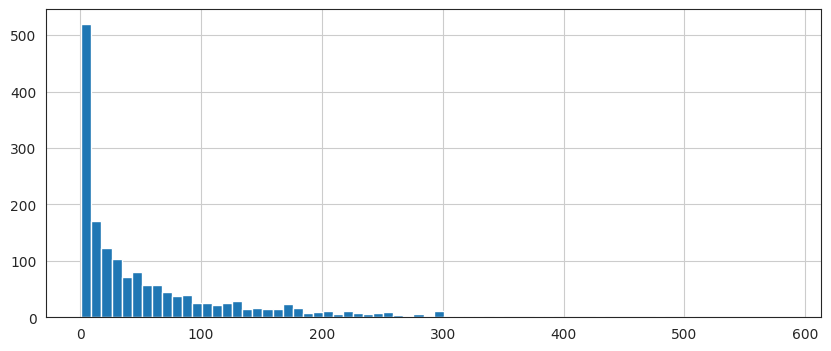

In [48]:
plt.figure(figsize = (10,4))
ratings['numOfRatings'].hist(bins = 70)

<Axes: >

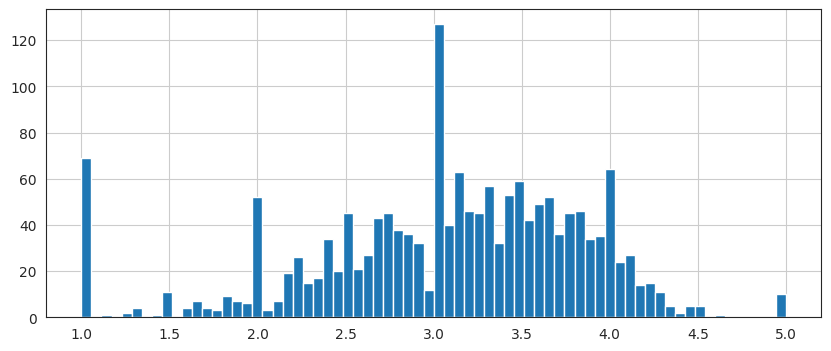

In [49]:
plt.figure(figsize = (10,4))
ratings['rating'].hist(bins = 70)

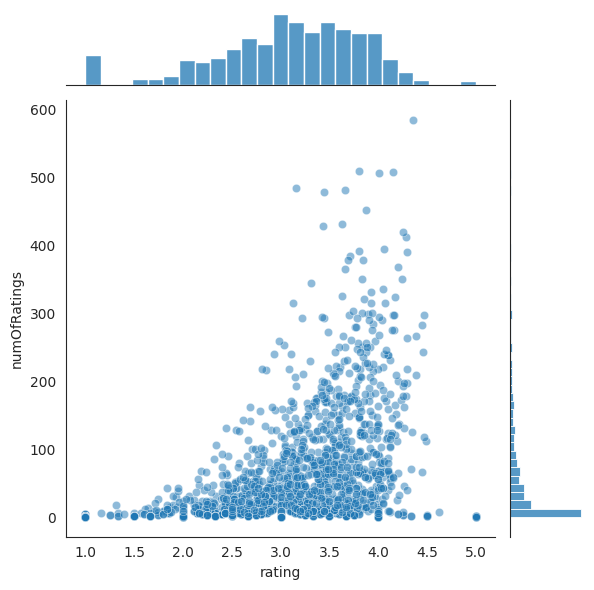

In [50]:
sns.jointplot(x='rating', y='numOfRatings', data = ratings, alpha = 0.5)

### Create the Recommendation System

Create a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.

In [51]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
#Most Rated Movies with their Average Ratings
ratings.sort_values('numOfRatings', ascending = False).head(10)

,rating,numOfRatings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


Now we will create a correlation matrix of every movie with every other movie on user ratings. We will then use that correlation matrix to find top matches that relates the best for a particular movie (having atleast 100 ratings) and the result obtained (recommended movies) will then be added to the ratings dataframe of every movie. Those whose matches could not be obtained using correlation, their value will be converted to "-".

In [53]:
import warnings

# Filter out all warnings
warnings.filterwarnings("ignore")

for i in ratings.index:
    movieUserRatings = moviemat[i]
    similarToThatMovie = moviemat.corrwith(movieUserRatings)
    corr_toMovie = pd.DataFrame(similarToThatMovie, columns = ['Correlation'])
    corr_toMovie.dropna(inplace = True)
    corr_toMovie = corr_toMovie.join(ratings['numOfRatings'])
    result = corr_toMovie[corr_toMovie['numOfRatings'] > 100].sort_values('Correlation', ascending = False).head()
    if result['numOfRatings'].count() >= 5:
        print(i)
        ratings.loc[i, 'FirstMovieRecommendation'] = result.iloc[1:2].index.values[0]
        ratings.loc[i, 'SecondMovieRecommendation'] = result.iloc[2:3].index.values[0]
        ratings.loc[i, 'ThirdMovieRecommendation'] = result.iloc[3:4].index.values[0]
        ratings.loc[i, 'FourthMovieRecommendation'] = result.iloc[4:5].index.values[0]
    

'Til There Was You (1997)
1-900 (1994)
101 Dalmatians (1996)
12 Angry Men (1957)
187 (1997)
2 Days in the Valley (1996)
20,000 Leagues Under the Sea (1954)
2001: A Space Odyssey (1968)
39 Steps, The (1935)
8 1/2 (1963)
8 Heads in a Duffel Bag (1997)
8 Seconds (1994)
A Chef in Love (1996)
Above the Rim (1994)
Absolute Power (1997)
Abyss, The (1989)
Ace Ventura: Pet Detective (1994)
Ace Ventura: When Nature Calls (1995)
Across the Sea of Time (1995)
Addams Family Values (1993)
Addicted to Love (1997)
Addiction, The (1995)
Adventures of Pinocchio, The (1996)
Adventures of Priscilla, Queen of the Desert, The (1994)
Adventures of Robin Hood, The (1938)
Affair to Remember, An (1957)
African Queen, The (1951)
Afterglow (1997)
Age of Innocence, The (1993)
Air Bud (1997)
Air Force One (1997)
Air Up There, The (1994)
Airheads (1994)
Akira (1988)
Aladdin (1992)
Aladdin and the King of Thieves (1996)
Alaska (1996)
Albino Alligator (1996)
Alice in Wonderland (1951)
Alien (1979)
Alien 3 (1992)
Alien

In [54]:
#Check the result 
ratings.head()

,rating,numOfRatings,FirstMovieRecommendation,SecondMovieRecommendation,ThirdMovieRecommendation,FourthMovieRecommendation
title,,,,,,
'Til There Was You (1997),2.333333,9,"Edge, The (1997)",William Shakespeare's Romeo and Juliet (1996),Star Trek: The Wrath of Khan (1982),Dumbo (1941)
1-900 (1994),2.600000,5,"Full Monty, The (1997)","Crow, The (1994)","Ice Storm, The (1997)",Hoop Dreams (1994)
101 Dalmatians (1996),2.908257,109,Murder at 1600 (1997),Miracle on 34th Street (1994),Being There (1979),"Remains of the Day, The (1993)"
12 Angry Men (1957),4.344000,125,Ulee's Gold (1997),Rear Window (1954),Seven Years in Tibet (1997),Clerks (1994)
187 (1997),3.024390,41,Maverick (1994),Conan the Barbarian (1981),"Magnificent Seven, The (1954)",Cool Hand Luke (1967)


In [60]:
ratings = ratings.fillna('-')

In [64]:
#Save the ratings data for later use
ratings.to_csv('MovieRecommendations.csv', encoding='utf-8' , index= False)

# Load the Saved Recommendation Data Generated for Reusability

In [73]:
#Load the dataset saved for reusability from this code block onwards
df_result = pd.read_csv('/kaggle/input/movie-recommendation/MovieRecommendations.csv')
df_result.head()

,title,rating,numOfRatings,FirstMovieRecommendation,SecondMovieRecommendation,ThirdMovieRecommendation,FourthMovieRecommendation
0,'Til There Was You (1997),2.333333,9,Primal Fear (1996),Indiana Jones and the Last Crusade (1989),"Edge, The (1997)",Beautiful Girls (1996)
1,1-900 (1994),2.600000,5,"Full Monty, The (1997)","Crow, The (1994)","Ice Storm, The (1997)",Hoop Dreams (1994)
2,101 Dalmatians (1996),2.908257,109,Murder at 1600 (1997),Miracle on 34th Street (1994),Being There (1979),"Remains of the Day, The (1993)"
3,12 Angry Men (1957),4.344000,125,Ulee's Gold (1997),Rear Window (1954),Seven Years in Tibet (1997),Clerks (1994)
4,187 (1997),3.024390,41,Maverick (1994),Conan the Barbarian (1981),"Magnificent Seven, The (1954)",Cool Hand Luke (1967)


In [74]:
#Load all the movie names
for i in df_result['title']:
    print(i)

'Til There Was You (1997)
1-900 (1994)
101 Dalmatians (1996)
12 Angry Men (1957)
187 (1997)
2 Days in the Valley (1996)
20,000 Leagues Under the Sea (1954)
2001: A Space Odyssey (1968)
3 Ninjas: High Noon At Mega Mountain (1998)
39 Steps, The (1935)
8 1/2 (1963)
8 Heads in a Duffel Bag (1997)
8 Seconds (1994)
A Chef in Love (1996)
Above the Rim (1994)
Absolute Power (1997)
Abyss, The (1989)
Ace Ventura: Pet Detective (1994)
Ace Ventura: When Nature Calls (1995)
Across the Sea of Time (1995)
Addams Family Values (1993)
Addicted to Love (1997)
Addiction, The (1995)
Adventures of Pinocchio, The (1996)
Adventures of Priscilla, Queen of the Desert, The (1994)
Adventures of Robin Hood, The (1938)
Affair to Remember, An (1957)
African Queen, The (1951)
Afterglow (1997)
Age of Innocence, The (1993)
Aiqing wansui (1994)
Air Bud (1997)
Air Force One (1997)
Air Up There, The (1994)
Airheads (1994)
Akira (1988)
Aladdin (1992)
Aladdin and the King of Thieves (1996)
Alaska (1996)
Albino Alligator (1

In [88]:
inputMovieName = widgets.Text()

def getRecommendations(a):
    searchMovie = a
    list_result = df_result[df_result['title'] == searchMovie]
    fm = list_result['FirstMovieRecommendation'].values[0]
    sm = list_result['SecondMovieRecommendation'].values[0]
    tm = list_result['ThirdMovieRecommendation'].values[0]
    fourthm = list_result['FourthMovieRecommendation'].values[0]
    finalRecommendationText = '1:' + fm + ' \n2:' + sm + ' \n3:' + tm + ' \n4:' + fourthm
    print('Your Recommendations for the Movie ' + searchMovie + ' are:\n')
    print(finalRecommendationText)
    

### How to get Recommendations?
- Select and Copy any movie from the list of Movie Names above
- Add that to the text box below
##### You will have your Movie Recommendation for that Particular movie :)

Note:- On every run the paste command will keep on appending the current output. To clear the output just run the below cell again.

In [94]:
a=input("Enter the movie for which you need the recommendation")

Enter the movie for which you need the recommendation North (1994)


In [99]:
getRecommendations(a)

Your Recommendations for the Movie North (1994) are:

1:Mystery Science Theater 3000: The Movie (1996) 
2:Monty Python's Life of Brian (1979) 
3:Star Trek: The Motion Picture (1979) 
4:Everyone Says I Love You (1996)
